# Experimenting with DataBlock API

This is the core API in fastai where work with data.
So, mastering this is pretty crucial.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

## MNIST example (Images on Folders)

In [3]:
path = untar_data(URLs.MNIST_TINY); path.ls()

[PosixPath('/home/arunoda_susiripala/.fastai/data/mnist_tiny/labels.csv'),
 PosixPath('/home/arunoda_susiripala/.fastai/data/mnist_tiny/models'),
 PosixPath('/home/arunoda_susiripala/.fastai/data/mnist_tiny/test'),
 PosixPath('/home/arunoda_susiripala/.fastai/data/mnist_tiny/valid'),
 PosixPath('/home/arunoda_susiripala/.fastai/data/mnist_tiny/train')]

In [4]:
!tree {path} -L 2

/home/arunoda_susiripala/.fastai/data/mnist_tiny
├── labels.csv
├── models
│   └── tmp.pth
├── test
│   ├── 1503.png
│   ├── 1605.png
│   ├── 1883.png
│   ├── 2032.png
│   ├── 205.png
│   ├── 2642.png
│   ├── 3515.png
│   ├── 3848.png
│   ├── 3878.png
│   ├── 4605.png
│   ├── 4654.png
│   ├── 500.png
│   ├── 5071.png
│   ├── 585.png
│   ├── 5988.png
│   ├── 617.png
│   ├── 6335.png
│   ├── 6501.png
│   ├── 6517.png
│   └── 6736.png
├── train
│   ├── 3
│   └── 7
└── valid
    ├── 3
    └── 7

8 directories, 22 files


As you can see, this dataset is grouped everything into directories.<br/>
Even lables are in an it's own sub directories.<br/>
Let's try to load this dataset.

In [5]:
# load images
data = ImageItemList.from_folder(path)
# split images into training and validation
data = data.split_by_folder('train', 'valid')
# get lables for images based on folders
data = data.label_from_folder()
# add the test dataset
data = data.add_test_folder('test')
# transform them
data = data.transform(get_transforms(do_flip=False), size=64)
# get the databunch
db = data.databunch()

In [6]:
dir(db)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_tfm',
 'batch_stats',
 'create',
 'create_from_ll',
 'device',
 'dl',
 'dls',
 'from_csv',
 'from_df',
 'from_folder',
 'from_lists',
 'from_name_func',
 'from_name_re',
 'labels_to_csv',
 'loss_func',
 'normalize',
 'path',
 'show_batch',
 'single_dl',
 'single_from_classes',
 'test_dl',
 'test_ds',
 'tfms',
 'train_dl',
 'train_ds',
 'valid_dl',
 'valid_ds']

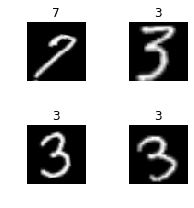

In [7]:
## Show some sample images from the training set.
db.show_batch(2, figsize=(3,3))

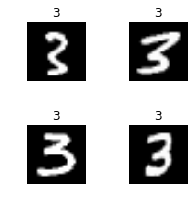

In [8]:
db.show_batch(2, figsize=(3,3), ds_type=DatasetType.Valid)

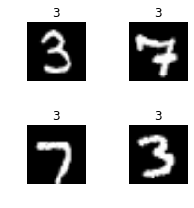

In [9]:
db.show_batch(2, figsize=(3,3), ds_type=DatasetType.Test)

## Planet Dataset (Multi Category)

This is the kaggle planet dataset.

In [10]:
planet = untar_data(URLs.PLANET_SAMPLE); planet.ls()

[PosixPath('/home/arunoda_susiripala/.fastai/data/planet_sample/labels.csv'),
 PosixPath('/home/arunoda_susiripala/.fastai/data/planet_sample/train')]

In [11]:
!tree {planet} | head

/home/arunoda_susiripala/.fastai/data/planet_sample
├── labels.csv
└── train
    ├── train_10001.jpg
    ├── train_10007.jpg
    ├── train_10030.jpg
    ├── train_10033.jpg
    ├── train_1004.jpg
    ├── train_10042.jpg
    ├── train_10075.jpg


In [12]:
!head {planet.ls()[0]}

image_name,tags
train_21983,partly_cloudy primary
train_9516,clear cultivation primary water
train_12664,haze primary
train_36960,clear primary
train_5302,haze primary road
train_13350,clear primary
train_19547,agriculture clear primary road
train_31388,partly_cloudy primary
train_32079,partly_cloudy primary


Here we've all the images a directory called `planet` and also we've a CSV where we've both image names and lables (They call them as tags).

Let's load them.

In [13]:
## load data
d = ImageItemList.from_csv(planet, 'labels.csv', folder="train", suffix=".jpg")

## train / validation split
## since it's not given we can do a random split
d = d.random_split_by_pct(0.2)

## label them.
d = d.label_from_df(1, sep=" ")

## Transform it
d = d.transform(get_transforms(flip_vert=True), size=64)

## get the databunch
db = d.databunch()

In [14]:
dir(db)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_tfm',
 'batch_stats',
 'create',
 'create_from_ll',
 'device',
 'dl',
 'dls',
 'from_csv',
 'from_df',
 'from_folder',
 'from_lists',
 'from_name_func',
 'from_name_re',
 'labels_to_csv',
 'loss_func',
 'normalize',
 'path',
 'show_batch',
 'single_dl',
 'single_from_classes',
 'test_dl',
 'test_ds',
 'tfms',
 'train_dl',
 'train_ds',
 'valid_dl',
 'valid_ds']

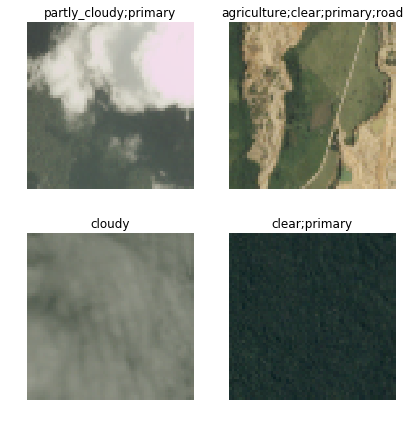

In [15]:
db.show_batch(2, figsize=(6, 6))

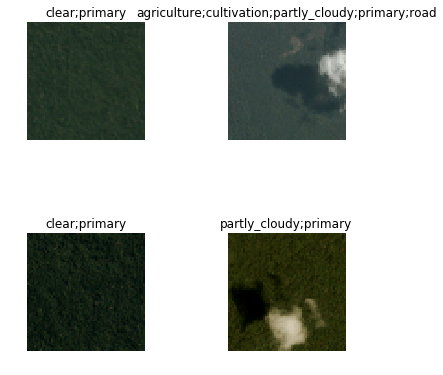

In [16]:
db.show_batch(2, figsize=(6, 6), ds_type=DatasetType.Valid)

In [17]:
db.train_ds[0]

(Image (3, 64, 64), MultiCategory partly_cloudy;primary)

## Camvid (Segmentation)

In [18]:
camvid = untar_data(URLs.CAMVID_TINY); camvid

PosixPath('/home/arunoda_susiripala/.fastai/data/camvid_tiny')

In [19]:
!tree {camvid} -L 1 

/home/arunoda_susiripala/.fastai/data/camvid_tiny
├── codes.txt
├── images
└── labels

2 directories, 1 file


In [20]:
!head {camvid/"codes.txt"}

Animal
Archway
Bicyclist
Bridge
Building
Car
CartLuggagePram
Child
Column_Pole
Fence


In [21]:
## Load data
d = SegmentationItemList.from_folder(camvid/"images")

# ## Split train/valid
d = d.random_split_by_pct(0.2)

## Add labels
camvid_classes = np.loadtxt(camvid/"codes.txt", dtype=str)
get_y_fn = lambda x: (camvid/"labels")/f'{x.stem}_P{x.suffix}'
d = d.label_from_func(get_y_fn, classes=camvid_classes)

# transform it
d = d.transform(get_transforms(do_flip=False, max_rotate=0., max_zoom=0., max_warp=0.), tfm_y=True, size=128)

db = d.databunch()

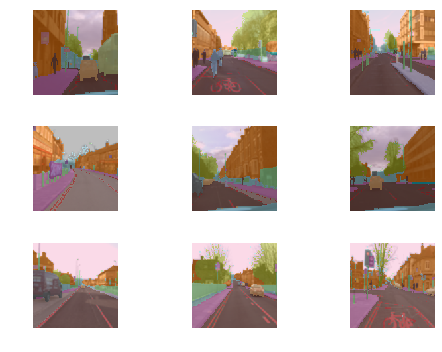

In [22]:
db.show_batch(3, figsize=(7, 5))